# Numerical simulations of a DSGE Model with Python
 
In this notebook, using the Python programming language, a basic Dynamic Stochastic General Equilibrium (DSGE) model of the real business cycle (REC) type is solved numerically. The model presented in this paper follows Costa (2016), and the numerical solution of the log-linearised version of this model ˗around its non-stochastic steady state˗ is based on the codes of the models simulated in the Python ‘linearsolve’ module developed by Brian C. Jenkins (link: https://www.briancjenkins.com/linearsolve/docs/build/html/index.html).  The detailed analytical development of this model ("A Dynamic Stochastic General Equilibrium (DSGE) Model: Numerical Simulations with Dynare, Microsoft Excel, and Matlab") and some numerical simulations executed in Matlab, Dynare and Microsoft Excel can be found at the following link: https://sites.google.com/view/ciroeduardobazannavarro/teaching/lecture-notes-slides-and-codes/macroeconomics-and-economic-growth.

# Model Assumptions

I.- The Economy: 

* It is exchange (No money), closed, without government, and is inhabited by households and firms.  

* There are no frictions and the factor markets and the markets of goods and services are perfectly competitive. Everything that is produced is used       for consumption or investment (savings).

II.- The representative household: 

* Owns the factors of production and all the shares of the representative firm. 

* Maximises the expected value of the sum of current utility and future utility flows discounted to present value, subject to the budget constraint it     faces over time. 

* Forms his expectations about the future values of prices, wages and return on capital under a rational expectations framework. 

* Knows the probability distribution that generates the total factor productivity $A_t$. 

III.- The representative firm:

* Produces goods and services that will be consumed or saved (and then transformed into physical capital) by households.

* Maximises its profits in a framework of perfect competition (perfectly competitive factor and goods and services markets) subject to a technological     constraint (the production function), given $A_t$.  

* Does not make investment decisions and decides the amount of capital and labour to rent period by period.

* Knows the probability distribution that generates $A_t$. 

IV.- The technology shock:

* The growth of $A_t$ is ignored, and $A_t$ is assumed to follow a stochastic autoregressive process of order 1 (AR1). 

* The technology shock $\vartheta_t$, which affects $A_t$, is white noise.

## Non-linear DSGE model and general equilibrium
    
The equilibrium conditions for DSGE model are:

$$ Y_t = C_t + I_t \tag{1} $$
$$ K_{t+1} = (1 - \delta) K_t + I_t \tag{2} $$
$$ \frac{L_t^\varepsilon}{ C_t^\sigma} = \frac{W_t}{P_t} \tag{3} \\ $$ 
$$ C_t^{-\sigma} = \beta \mathbb{E}_t \left\{ C_{t+1}^{-\sigma} \left[ (1 - \delta) + \frac{R_{t+1}}{P_{t+1}} \right] \right\} \tag{4} \\ $$
$$ Y_t = A_t K_t^{\alpha} L_t^{1 - \alpha}\tag{5}  $$
$$ L_t = \frac{(1 - \alpha) Y_t P_t}{W_t} \tag{6} \\ $$
$$ K_t = \frac{\alpha Y_t P_t}{R_t} \tag{7} \\ $$ 
$$ P_t = \frac{1}{A_t} \left[ \frac{W_t}{1 - \alpha} \right]^{1 - \alpha} \left( \frac{R_t}{\alpha} \right)^\alpha \tag{8} \\ $$ 
$$ \ln A_{t+1} = (1 - \rho_A)\ln A_{SS} + \rho_A \ln A_t + \vartheta_{t+1} \tag{9} \\ $$ 
    
where $\\vartheta_{t+1} \\sim \\mathcal{N}(0,\\sigma_{\vartheta}^2)\$. 

The competitive general equilibrium of this Economy consists of determining the succession of variables $\left\{ C_t, L_t, I_t, Y_t, K_t, P_t, W_t, R_t, A_t \right\}_{t=0}^{\infty}$ that satisfy equations (1) to (9). Then, the Economy is characterised by 8 endogenous state variables and the exogenous state variable $A_t$-which is assumed to follow an exogenous stochastic process-, so that a system of 9 equations is needed to compute the competitive general equilibrium (Torres, 2016; Costa, 2018).
    
## Structure of the reduced non-linear DSGE model:

By performing some algebraic operations, we reduce the system of 9 equations of the non-linear DSGE model to the following system of 3 equations:

* Exogenous technology
$$ \ln A_t = (1 - \rho_A)\ln A_{SS} + \rho_A \ln A_{t-1} + \vartheta_t \tag{I} \\ $$

* Household Euler equation
$$ C_t^{-\sigma} = \beta \mathbb{E}_t \left\{ C_{t+1}^{-\sigma} \left[ (1 - \delta) +
\frac{ \alpha (1 - \alpha)^{\frac{1 - \alpha}{1 + \varepsilon}} A_{t+1}^{-\frac{2 + \varepsilon - \alpha}{1 + \varepsilon}} }
{ C_{t+1}^{\frac{\sigma(1 - \alpha)}{\alpha + \varepsilon}} 
K_{t+1}^{\frac{\varepsilon(1 - \alpha)}{\alpha + \varepsilon}} } 
\right] \right\} \tag{II} $$

* Goods market clearing
$$ A_t K_t^\alpha \left[ \frac{(1 - \alpha) A_t K_t^\alpha}{C_t^\sigma} \right]^{\frac{1 - \alpha}{\alpha + \varepsilon}} = C_t + K_{t+1} - (1 - \delta) K_t \tag{III} $$

Note that ‘linearsolve’ log-linearly approximates the non-linear DSGE model and solves it with the method of Klein (2000).

To perform numerical simulations of the log-linear version of the non-linear DSGE model, the same parameter values used by Costa (2016):

|  $$ \rho_A $$     | $$ \sigma_{\vartheta} $$       | $$ \beta $$   | $$ \sigma $$     | $$ \alpha $$  | $$ \delta $$  | $$ \alpha $$  | $$ \epsilon $$  |$$ A_{SS} $$     |
|-------------------|---------------------------------|---------------|---------------|---------------|---------------|---------------|-----------------|-----------------|
| 0.95              | 0.01                           | 0.985          | 2.00          | 0.35          |  0.025        | 0.35          |  1.5         |  1.0         |

#  Simulating the log-linear DSGE model with linearsolve by Jenkins (2024)

## Import Python libraries (numpy, pandas, linearsolve, matplotlib)

In [1639]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import linearsolve as ls
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'w'

## Store the parameters of the log-linearized DSGE model.

In [1641]:
parameters = pd.Series(dtype=float)
parameters['alpha'] = 0.35  # Partial elasticity of production
parameters['beta'] = 0.985  # Inter-temporal discount rate of the representative household
parameters['delta'] = 0.025 # Capital stock depreciation rate
parameters['rho_A'] = 0.95  # Technology Shock persistence
parameters['sigma'] = 2     # Arrow and Pratt's relative risk aversion coefficient
parameters['epsilon'] = 1.5 # curvature of labour disutility
parameters['Ass'] = 1       # Steady-state value of total factor productivity

## Function that evaluates the equilibrium conditions of the log-linearized DSGE model

In [1643]:
def equations(variables_forward, variables_current, parameters):
    # Parameters
    p = parameters

    # Variables
    fwd = variables_forward
    cur = variables_current

    # Household Euler equation
    euler_eqn = p.beta * fwd.C ** (-p.sigma) * (1 - p.delta + ((p.alpha*(1-p.alpha)**((1-p.alpha)/(1+p.epsilon))))*cur.A**((2+p.epsilon-p.alpha)/(1+p.epsilon))/((fwd.C**(p.sigma*(1-p.alpha)/(1+p.epsilon)))*(fwd.K**((p.epsilon*(1-p.alpha))/(p.alpha+p.epsilon))))) - cur.C ** (-p.sigma)

    # Goods market clearing
    market_clearing = cur.C + fwd.K - (1 - p.delta) * cur.K - cur.A * cur.K ** p.alpha*((1-p.alpha)*cur.A*cur.K**p.alpha/(cur.C**p.sigma))**((1-p.alpha)/(p.alpha+p.epsilon))

    # Exogenous technology
    technology_proc = p.rho_A * np.log(cur.A) + (1-p.rho_A)*np.log(p.Ass)- np.log(fwd.A)

    
    # Stack equilibrium conditions into a numpy array
    return np.array([euler_eqn, market_clearing, technology_proc])

## Initialize the log-linearized RBC model

In [1645]:
model = ls.model(equations=equations, n_states=2, n_exo_states=1, variables=['A', 'K', 'C'], shock_names=['e_A'],parameters=parameters)

## Numerically calculate the steady state of the log-linearized DSGE model

In [1647]:
guess = [1, 1, 1]
model.compute_ss(guess)

## Find the linear approximation around the non-stochastic steady state and solve

In [1649]:
model.approximate_and_solve(log_linear=True)

## Simulate impulse-response functions

Simulate, over a period of $ T=151 $ time units, the responses of the  model variables to a productivity shock (of magnitude 0.01) that hits the economy (in steady state before the productivity shock) during a single period (the productivity shock occurs in the initial period $ t_0=0 $).

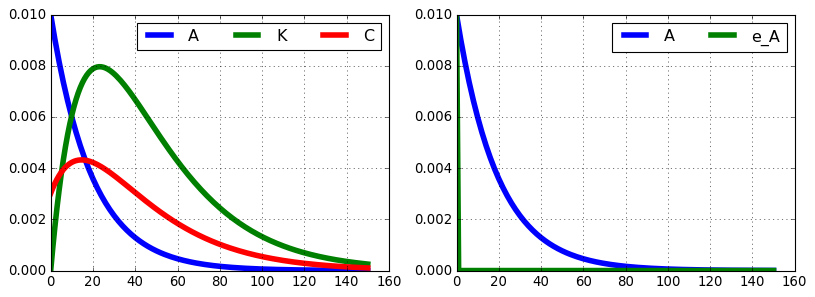

In [1652]:
model.impulse(T=151, t0=0, shocks=[0.01])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
(model.irs['e_A'][['A', 'K', 'C']]).plot(linewidth='5', alpha=1, grid=True, ax=ax1).legend(loc='upper right', ncol=3)
ax2 = fig.add_subplot(1, 2, 2)
(model.irs['e_A'][['A', 'e_A']] ).plot(linewidth='5', alpha=1, grid=True, ax=ax2).legend(loc='upper right', ncol=2)

## Stochastic Simulation

Next, it is created a $ T=401 $  period (including t=0) simulation by first simulating the model for 551 periods and then dropping the first 150 values. The standard deviation of successive productivity shocks is set to 0.01. Following Jenkins (2024), the seed for the numpy random number generator is set to 140000.

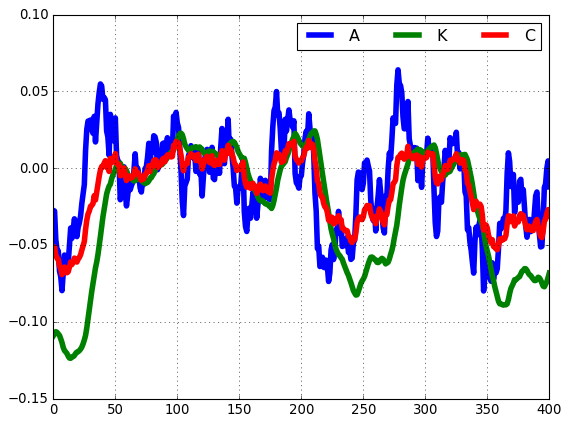

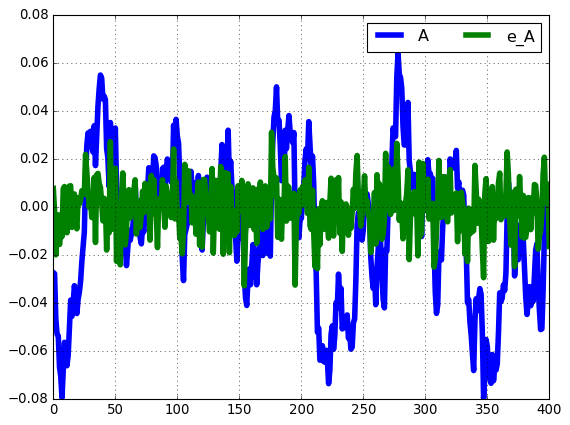

In [1655]:
model.stoch_sim(T=401,drop_first=150,covariance_matrix=np.array([0.01**2]),seed=140000)
model.simulated[['A', 'K', 'C']].plot(linewidth='5', grid=True).legend(loc='upper right',ncol=4)
model.simulated[['A']].plot(linewidth='5',grid=True).legend(ncol=4)
model.simulated['e_A'].plot(linewidth='5',grid=True).legend(ncol=4)
plt.show()

# Bibliographic references

* Bazán, C.; Larios, J.; Mougenot, B. & Almerco, J. (2021). Modelos de macroeconomía dinámica Fondo editorial USIL. https://fondoeditorialusil1719871532.publica.la/library/publication/modelos-de-macroeconomia-dinamica-1726782148

* Costa, C. (2016): Understanding DSGE. Vernon Press.

* Costa, C.; García-Cintado, A.C. (2018): Teaching DSGE Models to Undergraduates, EconomiA, Vol. 19, Iss. 3, pp. 424-444, https://doi.org/10.1016/j.econ.2018.11.001.

* Jenkins, B. (2024): Linearsolve: A Python module for solving linear dynamic models using Klein's (2000) method and creating custom simulations, https://github.com/letsgoexploring/linearsolve

* Klein, P. (2000). Using the Generalized Schur Form to Solve a Multivariate Linear Rational Expectations Model. Journal of Economic Dynamics and Control, Vol. 24, Nº 10, pp. 1405-1423, https://doi.org/10.1016/S0165-1889(99)00045-7

* Torres, J.L. (2016): Introduction to Dynamics Macroeconomic General Equilibium Models. Second Edition. Vernon Press.